In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **About the Dataset**
This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)

1. Class: no-recurrence-events, recurrence-events
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. menopause: lt40, ge40, premeno.
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. node-caps: yes, no.
7. deg-malig: 1, 2, 3.
8. breast: left, right.
9. breast-quad: left-up, left-low, right-up, right-low, central.
10. irradiat: yes, no.

Source dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

In [2]:
# Import the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Read Dataset**

In [3]:
df = pd.read_csv("/content/breast-cancer.data", header = None)
df

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [4]:
df_renamed = df.rename(columns = {0: "Class", 1: "Age", 2: "menopause", 3: "tumor-size", 4: "inv-nodes",
                                  5: "node-caps", 6: "deg-malig", 7: "breast", 8: "breast-quad", 9: "irradiat"})
df_renamed

,Class,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


**Check missing and information of dataset**

In [5]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
df_renamed.isna().sum()

Class          0
Age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [7]:
df_renamed.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


# Data Analytics

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


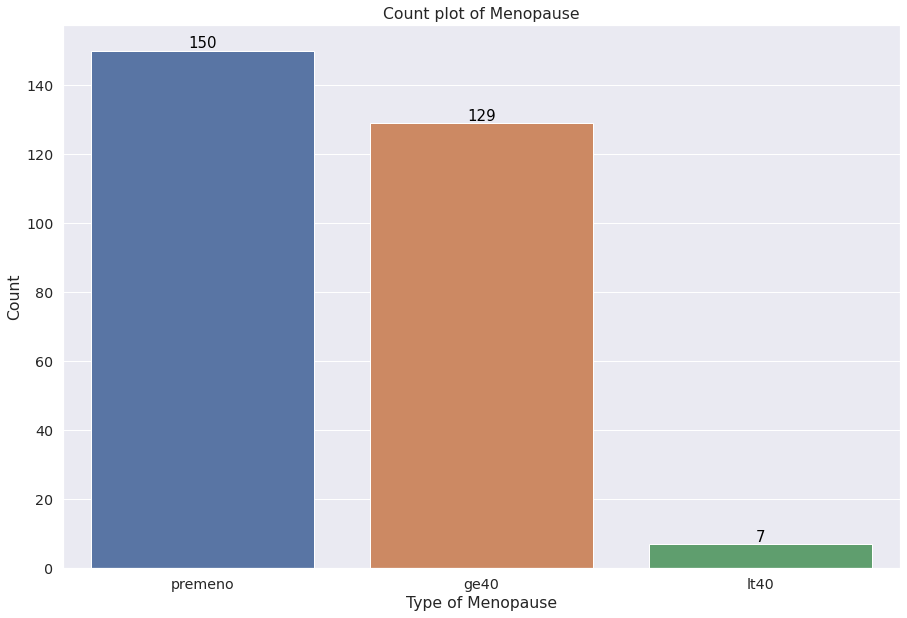

In [8]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.3)
count_class = sns.countplot(df_renamed["menopause"])
count_class.set_xlabel(count_class.get_xticklabels())

for counts in count_class.patches:
  bar_height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / bar_height + bar_height
  plt.text(label_x, label_y, s = f"{bar_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Type of Menopause")
plt.ylabel("Count")
plt.title("Count plot of Menopause")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


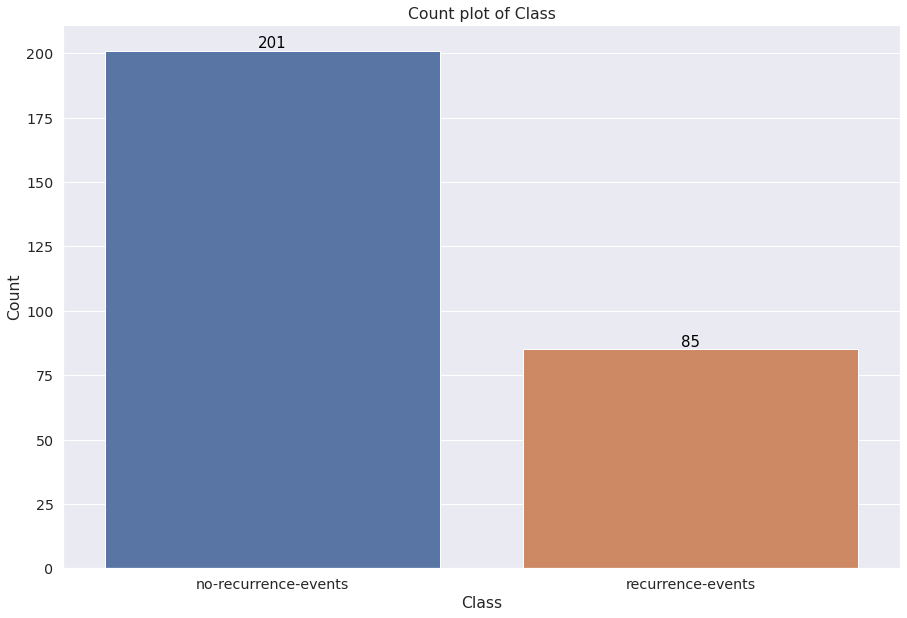

In [9]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.3)
count_class = sns.countplot(df_renamed["Class"])
count_class.set_xlabel(count_class.get_xticklabels())

for counts in count_class.patches:
  bar_height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / bar_height + bar_height
  plt.text(label_x, label_y, s = f"{bar_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count plot of Class")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


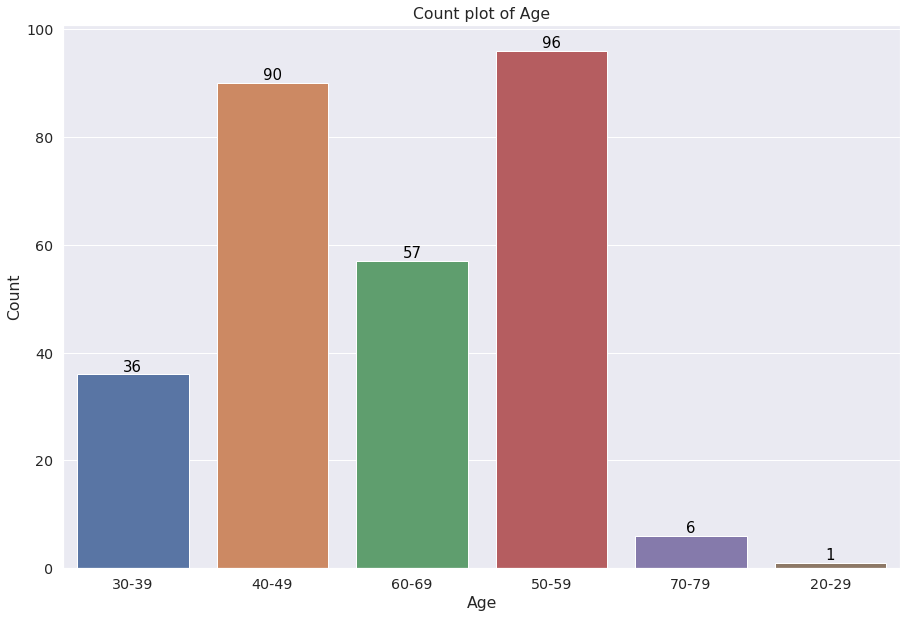

In [10]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.3)
count_age = sns.countplot(df_renamed["Age"])
count_age.set_xlabel(count_age.get_xticklabels())

for counts in count_age.patches:
  bar_height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / bar_height + bar_height
  plt.text(label_x, label_y, s = f"{bar_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count plot of Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


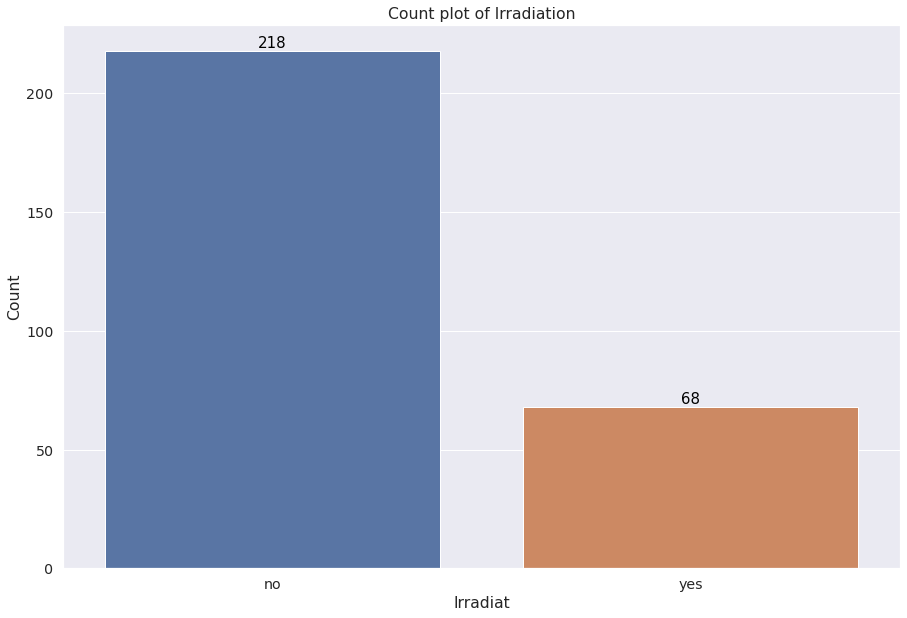

In [11]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.3)
count_irradiat = sns.countplot(df_renamed["irradiat"])
count_irradiat.set_xlabel(count_irradiat.get_xticklabels())

for counts in count_irradiat.patches:
  bar_height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / bar_height + bar_height
  plt.text(label_x, label_y, s = f"{bar_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Irradiat")
plt.ylabel("Count")
plt.title("Count plot of Irradiation")
plt.show()

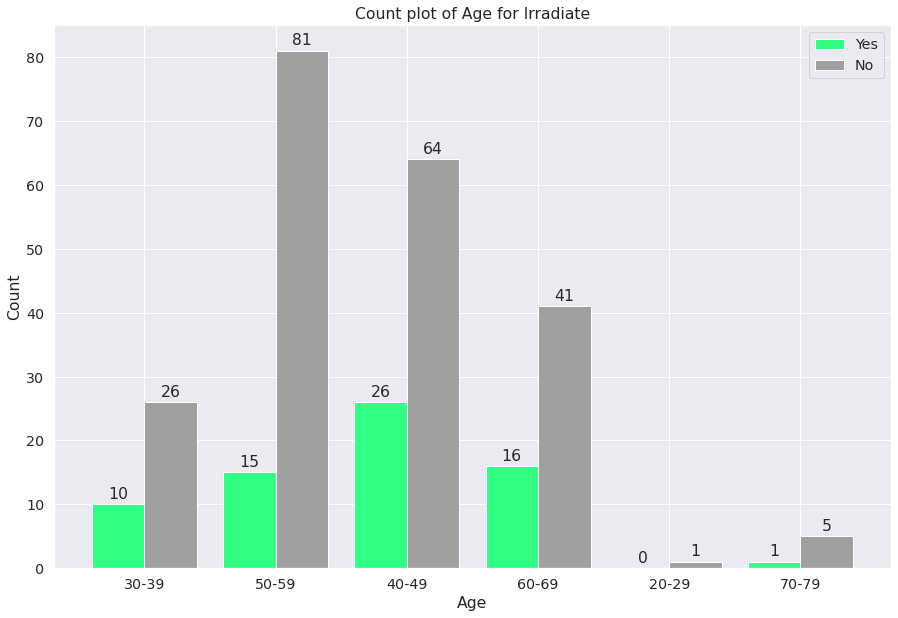

In [12]:
# Irritants 
df_name_col = df_renamed[["Age"]]
df_name_col = df_name_col.values.tolist()
df_age = []
for item in df_name_col: 
  df_age.append(item[0])

df_age = list(set(df_age))  #lọc 
df_age
df_yes = []
df_no = []
for item in df_age: 
  df_by_age = df_renamed[df_renamed["Age"] == item]
  df_yes.append(len(df_by_age[df_by_age["irradiat"] == "yes"]))
  df_no.append(len(df_by_age[df_by_age["irradiat"] == "no"]))

df_no
df_yes

X_axis = np.arange(len(df_age))

plt.figure(figsize = (15, 10))
rects1 = plt.bar(X_axis - 0.2, df_yes, 0.4, label = 'Yes', color = "#30FF84")
rects2 = plt.bar(X_axis + 0.2, df_no, 0.4, label = 'No', color = "#A0A0A0")

plt.bar_label(rects1, padding = 3)
plt.bar_label(rects2, padding = 3)

plt.xticks(X_axis, df_age)
plt.title("Count plot of Age for Irradiate")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

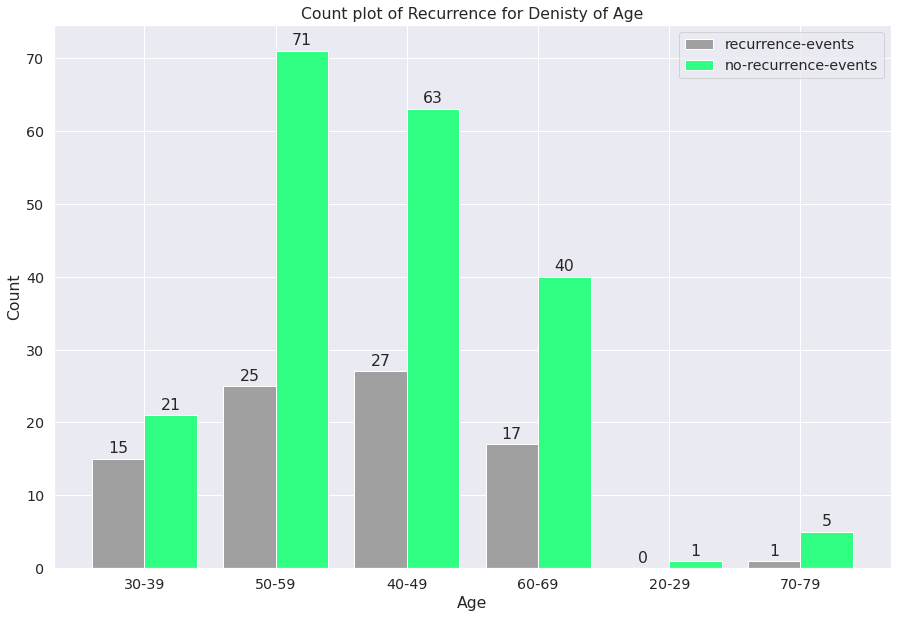

In [13]:
# Class
df_name_col = df_renamed[["Age"]]
df_name_col = df_name_col.values.tolist()
df_age = []
for item in df_name_col: 
  df_age.append(item[0])

df_age = list(set(df_age))  #lọc 
df_age
df_recurrence_events = []
df_no_recurrence_events = []
for item in df_age: 
  df_by_age = df_renamed[df_renamed["Age"] == item]
  df_recurrence_events.append(len(df_by_age[df_by_age["Class"] == "recurrence-events"]))
  df_no_recurrence_events.append(len(df_by_age[df_by_age["Class"] == "no-recurrence-events"]))

df_no_recurrence_events
df_recurrence_events

plt.figure(figsize = (15, 10))
X_axis = np.arange(len(df_age))

rects1 = plt.bar(X_axis - 0.2, df_recurrence_events, 0.4, label = 'recurrence-events', color = "#A0A0A0")
rects2 = plt.bar(X_axis + 0.2, df_no_recurrence_events, 0.4, label = 'no-recurrence-events', color = "#30FF84")

plt.bar_label(rects1, padding = 3)
plt.bar_label(rects2, padding = 3)

plt.xticks(X_axis, df_age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count plot of Recurrence for Denisty of Age")
plt.legend()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn import preprocessing
from sklearn.metrics import plot_roc_curve

In [15]:
# Encode string into incremental value
le = preprocessing.LabelEncoder()
for column_name in df_renamed.columns:
   if df_renamed[column_name].dtype == object:
     df_renamed[column_name] = le.fit_transform(df_renamed[column_name])

df_renamed[[column_name]]

,irradiat
0,0
1,0
2,0
3,0
4,0
...,...
281,0
282,1
283,0
284,0


In [16]:
x = df_renamed[["Age", "menopause",	"tumor-size", "inv-nodes", "node-caps",	"deg-malig","breast",	"breast-quad","irradiat"]]
x

,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,5,0,1,3,0,2,0
1,2,2,3,0,1,2,1,5,0
2,2,2,3,0,1,2,0,2,0
3,4,0,2,0,1,2,1,3,0
4,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...
281,1,2,5,0,1,2,0,3,0
282,1,2,3,0,1,3,0,3,1
283,4,0,3,0,1,1,1,3,0
284,2,0,5,4,1,3,0,2,0


In [17]:
y = df_renamed[["Class"]]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
281,1
282,1
283,1
284,1


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((200, 9), (86, 9), (200, 1), (86, 1))

In [19]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        286 non-null    int64
 1   Age          286 non-null    int64
 2   menopause    286 non-null    int64
 3   tumor-size   286 non-null    int64
 4   inv-nodes    286 non-null    int64
 5   node-caps    286 non-null    int64
 6   deg-malig    286 non-null    int64
 7   breast       286 non-null    int64
 8   breast-quad  286 non-null    int64
 9   irradiat     286 non-null    int64
dtypes: int64(10)
memory usage: 22.5 KB


# Anaylsis with the Algorithms

**Naive Bayes**

In [20]:
# Calucalte with Naive Bayes
model_NB = GaussianNB()
model_NB.fit(x_train, y_train.values.ravel())

# Run prediction
y_prediction_NB = model_NB.predict(x_test)
y_prediction_NB

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

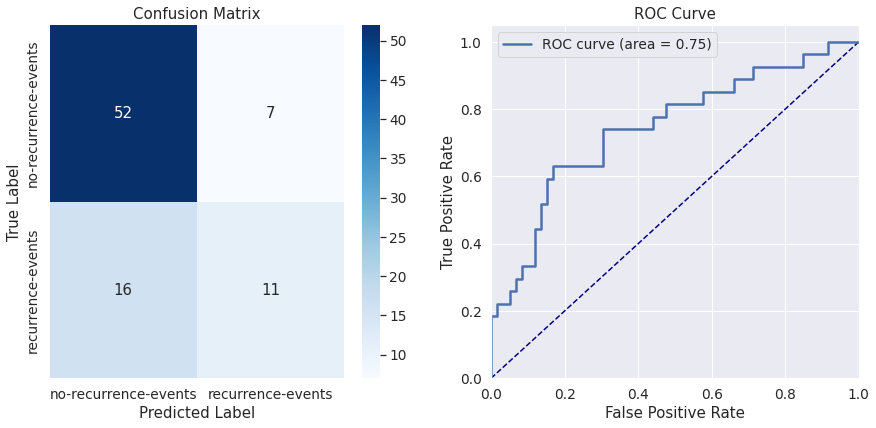

In [21]:
cm = confusion_matrix(y_test, y_prediction_NB)
df_cm_NB = pd.DataFrame(cm, range(2),
                  range(2))

plt.figure(figsize = (14.5, 6.5))
sns.set(font_scale = 1.25)   # For label size
plt.subplot(1, 2, 1)
cm_plot = sns.heatmap(df_cm_NB, annot=True, fmt='n', annot_kws={"size": 15},
                      xticklabels = ['no-recurrence-events', 'recurrence-events'], 
                      yticklabels = ['no-recurrence-events', 'recurrence-events'], cmap = "Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

y_score_NB = model_NB.predict_proba(x_test)[:,1]
false_positive_rate_NB, true_positive_rate_NB, threshold_NB = roc_curve(y_test, y_score_NB)
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(false_positive_rate_NB, true_positive_rate_NB, linewidth = 2.5, 
         label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score_NB))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [22]:
accuracy_NB = accuracy_score(y_test, y_prediction_NB)
print("Naive Bayes Accuracy:", round(accuracy_NB * 100, 2), "%")

Naive Bayes Accuracy: 73.26 %


In [23]:
print('ROC Curve score for Naive Bayes:', roc_auc_score(y_test, y_score_NB))

ROC Curve score for Naive Bayes: 0.7457627118644068


**Decision Tree**

In [24]:
 # Fit method is used to train data
classifier = DecisionTreeClassifier(criterion="gini" ,random_state = 42, ccp_alpha = 0.005)
classifier = classifier.fit(x_train, y_train)

In [25]:
y_prediction_classifiers = classifier.predict(x_test)
y_prediction_classifiers

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

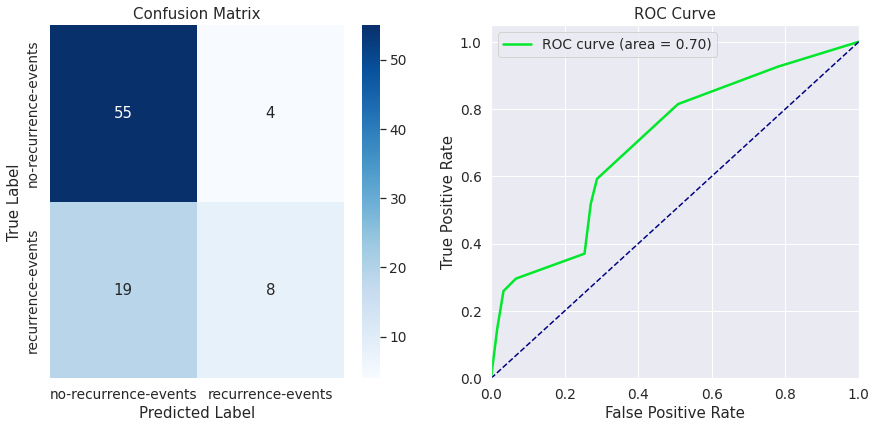

In [26]:
cm = confusion_matrix(y_test, y_prediction_classifiers)
df_cm_classifiers = pd.DataFrame(cm, range(2),
                  range(2))

plt.figure(figsize = (14.5, 6.5))
plt.subplot(1, 2, 1)
sns.set(font_scale = 1.25)   # For label size
cm_plot = sns.heatmap(df_cm_classifiers, annot=True, fmt='n', annot_kws={"size": 15}, 
                      xticklabels = ['no-recurrence-events', 'recurrence-events'],
                      yticklabels = ['no-recurrence-events', 'recurrence-events'], cmap = "Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.subplot(1, 2, 2)
accuracy_classifiers  = accuracy_score(y_test, y_prediction_classifiers)
y_score_classifier = classifier.predict_proba(x_test)[:,1]
false_positive_rate_classifier, true_positive_rate_classifier, threshold_classifier = roc_curve(y_test, y_score_classifier)
plt.plot(false_positive_rate_classifier, true_positive_rate_classifier, linewidth = 2.5,
         label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score_classifier), color = "#01E72C")
plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [27]:
print("Decision Tree Accuracy:", round(accuracy_classifiers * 100, 2), "%")

Decision Tree Accuracy: 73.26 %


In [28]:
print('ROC Curve score for Decision Tree is:', roc_auc_score(y_test, y_score_classifier))

ROC Curve score for Decision Tree is: 0.6964846202134338


In [29]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus
import collections

feature_columns = list(df_renamed.columns[:-1])
class_names = list(["recurrence-events", "no-recurrence-events"])

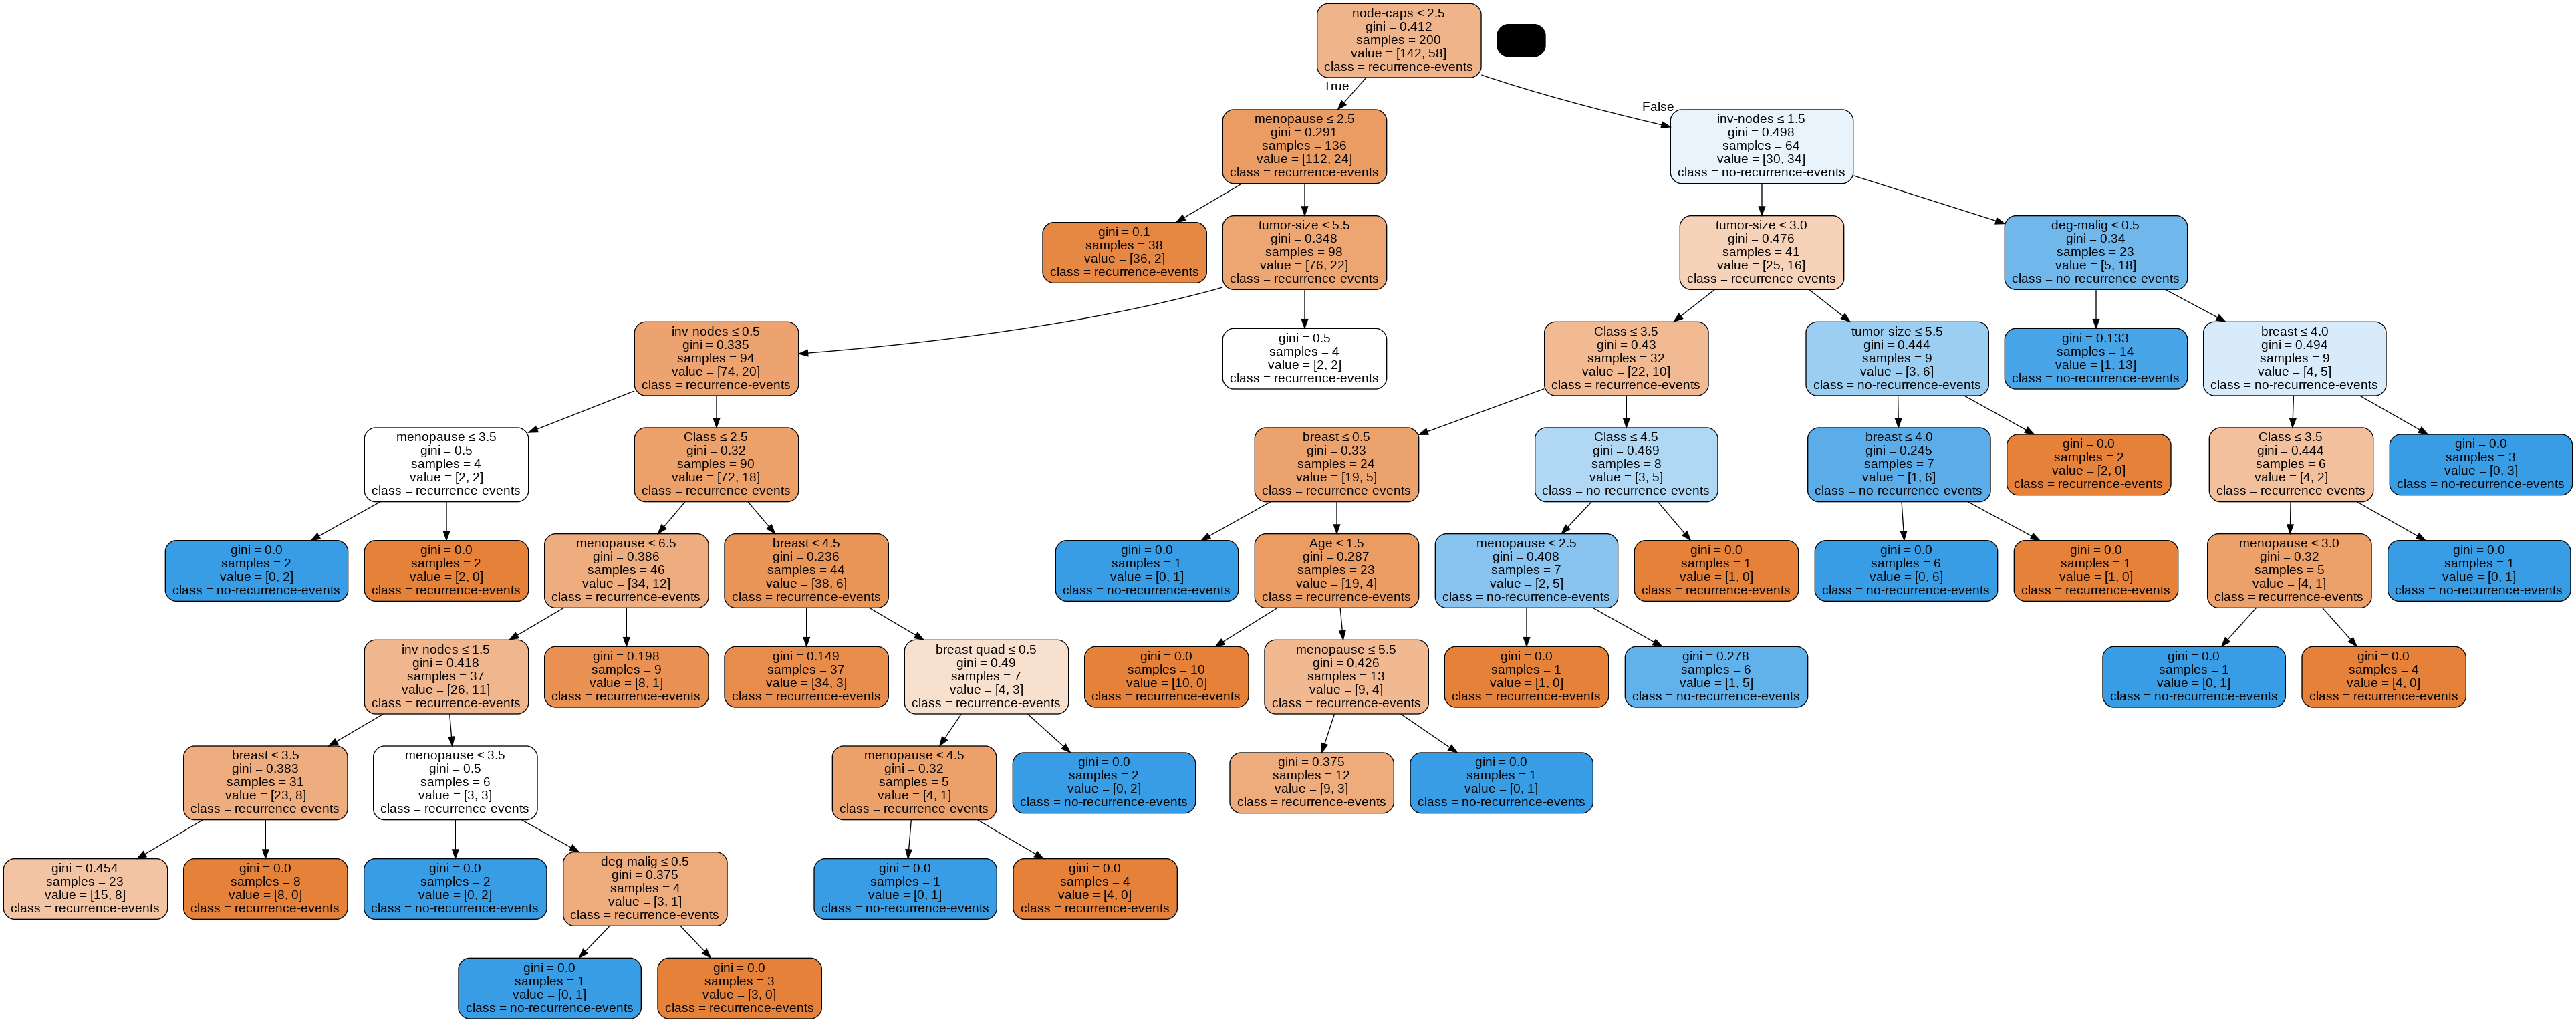

In [30]:
dot_data = StringIO()
tree.export_graphviz(classifier, out_file = dot_data, filled = True, rounded = True, 
                                  special_characters = True ,feature_names = feature_columns, class_names = class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

**Bayes**

In [31]:
# Using Bayes
b_NB = BernoulliNB()
b_NB_bayes = b_NB.fit(x_train, y_train.values.ravel())
b_NB_bayes

BernoulliNB()

In [32]:
y_prediction_BNB = b_NB.predict(x_test)
y_prediction_BNB

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

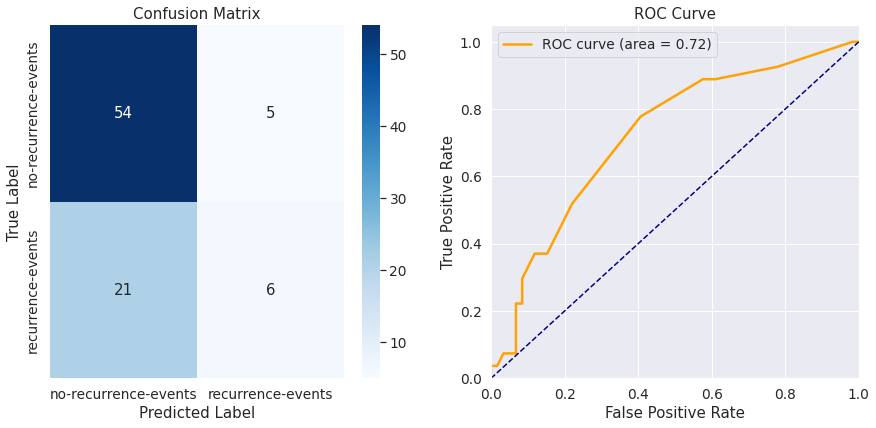

In [33]:
cm = confusion_matrix(y_test, y_prediction_BNB)
df_cm_bnb = pd.DataFrame(cm, range(2),
                  range(2))

plt.figure(figsize = (14.5, 6.5))
plt.subplot(1, 2, 1)
sns.set(font_scale = 1.25)   # For label size
cm_plot = sns.heatmap(df_cm_bnb, annot=True, fmt='n', annot_kws={"size": 15}, 
                      xticklabels = ['no-recurrence-events', 'recurrence-events'],
                      yticklabels = ['no-recurrence-events', 'recurrence-events'], cmap = "Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.subplot(1, 2, 2)
accuracy_bnb  = accuracy_score(y_test, y_prediction_BNB)
y_score_bnb = b_NB_bayes.predict_proba(x_test)[:,1]
false_positive_rate_BNB, true_positive_rate_BNB, threshold_BNB = roc_curve(y_test, y_score_bnb)
plt.plot(false_positive_rate_BNB, true_positive_rate_BNB, linewidth = 2.5,
         label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score_bnb), color = "#FFA204")
plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [34]:
print("Bayes Accuracy:", round(accuracy_bnb * 100, 2), "%")

Bayes Accuracy: 69.77 %


In [35]:
print('ROC Curve score for Bayes is:', roc_auc_score(y_test, y_score_bnb))

ROC Curve score for Bayes is: 0.7206528562460766


**Draw ROC for Naive Bayes, Bayes and Decision Tree and compute precision and recall for each algorithm**

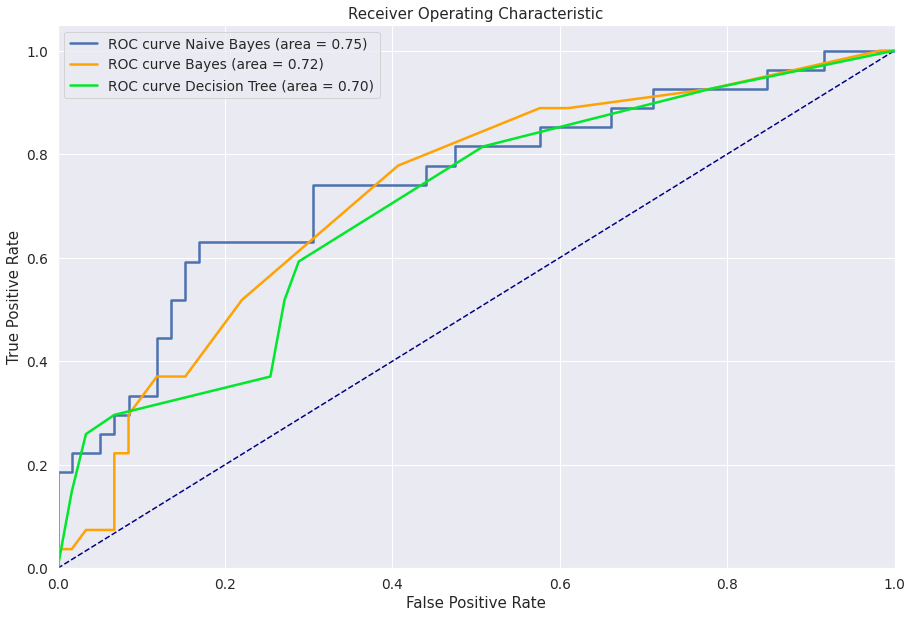

In [36]:
plt.figure(figsize = (15, 10))
plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(false_positive_rate_NB, true_positive_rate_NB, linewidth = 2.5, 
         label="ROC curve Naive Bayes (area = %0.2f)" % roc_auc_score(y_test, y_score_NB))
plt.plot(false_positive_rate_BNB, true_positive_rate_BNB, linewidth = 2.5,
         label="ROC curve Bayes (area = %0.2f)" % roc_auc_score(y_test, y_score_bnb), color = "#FFA204")
plt.plot(false_positive_rate_classifier, true_positive_rate_classifier, linewidth = 2.5,
         label="ROC curve Decision Tree (area = %0.2f)" % roc_auc_score(y_test, y_score_classifier), color = "#01E72C")
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [37]:
recall_NB = recall_score(y_test, y_prediction_NB)
recall_Tree = recall_score(y_test, y_prediction_classifiers)
recall_B = recall_score(y_test, y_prediction_BNB)

print("Recall Naive Bayes:", round(recall_NB, 2))
print("Recall Decision Tree:", round(recall_Tree, 2))
print("Recall Bayes:", round(recall_B, 2))

Recall Naive Bayes: 0.41
Recall Decision Tree: 0.3
Recall Bayes: 0.22


In [38]:
precision_NB = precision_score(y_test, y_prediction_NB)
precision_Tree = precision_score(y_test, y_prediction_classifiers)
precision_B = precision_score(y_test, y_prediction_BNB)

print("Precision Naive Bayes:", round(precision_NB, 2))
print("Precision Decision Tree:", round(precision_Tree, 2))
print("Precision Bayes:", round(precision_B, 2))

Precision Naive Bayes: 0.61
Precision Decision Tree: 0.67
Precision Bayes: 0.55
